# Plot functional mutant titer fold change

This notebook plots fold change in virus titers. 
Fold change was pre-calculated from titers calculated in virus_titers_functional_mutants.ipynb notebook

In [1]:
import os
import warnings

import math
import numpy as np 

from IPython.display import display, HTML
import matplotlib.pyplot as plt

from neutcurve.colorschemes import CBMARKERS, CBPALETTE
from mizani.formatters import scientific_format

import pandas as pd
from plotnine import *

import yaml

In [2]:
warnings.simplefilter('ignore')

In [3]:
with open('config.yaml') as f:
    config = yaml.safe_load(f)

In [4]:
resultsdir=config['resultsdir']
os.makedirs(resultsdir, exist_ok=True)

In [51]:
titer_fold_change = pd.read_csv(config['titer_fold_change'])
titer_fold_change

,virus,date,rescue_batch,for_testing,RLUperuL,WT_titers,fold_change
0,BA1_F375S,190722,1,functional_validation,9.230974e+05,4.996201e+05,1.847599
1,BA1_F375S,190722,2,functional_validation,6.427330e+05,4.996201e+05,1.286443
2,BA1_F375S,190722,3,functional_validation,1.195813e+06,4.996201e+05,2.393444
3,BA1_P793S,200722,1,functional_validation,1.365625e+06,1.133708e+06,1.204566
4,BA1_P793S,200722,2,functional_validation,1.232795e+06,1.001413e+06,1.231055
5,BA1_P793S,200722,3,functional_validation,1.275231e+06,1.027659e+06,1.240909
6,BA1_P1140T,180722,1,functional_validation,7.436016e+05,4.087164e+05,1.819358
7,BA1_P1140T,180722,2,functional_validation,7.144444e+05,4.848001e+05,1.473689
8,BA1_P1140T,180722,3,functional_validation,8.939412e+05,5.172177e+05,1.728366
9,BA1_P1143S,180722,1,functional_validation,6.646749e+05,4.087164e+05,1.626250


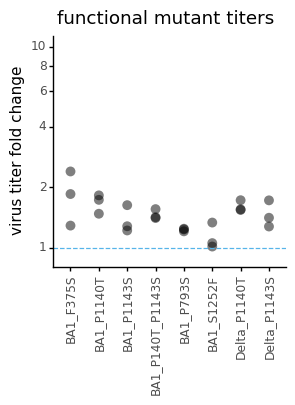

In [56]:
h = (ggplot(titer_fold_change, 
            aes(x='virus', y='fold_change')
           ) +
     geom_point(size=4, alpha=0.5, stroke = 0)+
     theme_classic() +
     theme(axis_text_x=element_text(angle=90, vjust=1, hjust=0.5),
           figure_size=(3,3),
           axis_title_x=element_blank(),
          ) +
     ylab('virus titer fold change')+
     labs(title='functional mutant titers') +
     scale_color_manual(values=CBPALETTE)+
     geom_hline(yintercept = 1, linetype="dashed", colour = CBPALETTE[2])+
     scale_y_log10(limits=[0.9,10], breaks=(1,2,4,6,8,10))

    )

_ = h.draw()

_.savefig(f'{resultsdir}/titer_fold_change.pdf', bbox_inches='tight')


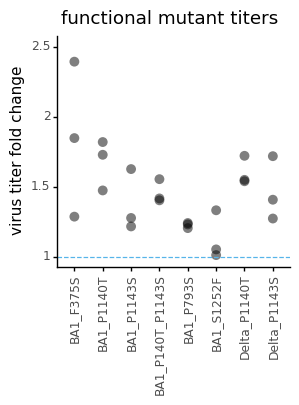

In [57]:
h = (ggplot(titer_fold_change, 
            aes(x='virus', y='fold_change')
           ) +
     geom_point(size=4, alpha=0.5, stroke = 0)+
     theme_classic() +
     theme(axis_text_x=element_text(angle=90, vjust=1, hjust=0.5),
           figure_size=(3,3),
           axis_title_x=element_blank(),
          ) +
     ylab('virus titer fold change')+
     labs(title='functional mutant titers') +
     scale_color_manual(values=CBPALETTE)+
     geom_hline(yintercept = 1, linetype="dashed", colour = CBPALETTE[2])+
     ylim(1,2.5)
    )

_ = h.draw()

_.savefig(f'{resultsdir}/titer_fold_change.pdf', bbox_inches='tight')
